# Importing Libraries

In [2]:
# numpy and sklear
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

#torch

import torch 
import torch.nn as nn
import torch.optim as optim

# Script

This section contains three scripts generated for logistic regression analysis.

1.  Data generation script
2.  Logistic Regression script
3.  Error Analysis

### Data Generation 

In [3]:

def generate_logistic_regression_data(n_samples, n_features,n_infornmative,n_redundant,flip_y = 0.05,random_state=None):
    """
    Generate synthetic dataset for logistic regression.

    Parameters:
    - n_samples (int): Number of samples.
    - n_features (int): Number of features.
    - random_state (int, optional): Seed for the random number generator.

    Returns:
    - X (numpy.ndarray): Feature matrix.
    - y (numpy.ndarray): Target vector.
    """
    X, y = make_classification(n_samples=n_samples, n_features=n_features,n_informative=n_infornmative, n_redundant=n_redundant,
                               n_clusters_per_class=1, flip_y=flip_y,class_sep=2,
                               n_classes=2, random_state=random_state)
    return X, y


### Logistic Regression

 The implementation strategy followed here is to use full batch gradeint descent method to minimize the binary cross entropy loss. For this I have used optim.SGD from PyTorch.

In [4]:
class LogisticRegression(nn.Module):

    #Designing the linear layer for regresiion 
    def __init__(self,input_dim,use_bias=False):
        super(LogisticRegression,self).__init__()
        #linear layer with a optinal bias 
        self.linear = nn.Linear(input_dim,1,bias = use_bias)
        
    def forward(self,x):
        #applying the linear layer 
        return torch.sigmoid(self.linear(x))

def train_logistic_regression(X_data,Y_data,epochs = 200 ,learning_rate = 0.1,use_bias = False):


    input_dim = X_data.shape[1]

    #converting X,y in to tensors
    X_data = torch.tensor(X_data, dtype=torch.float32)
    Y_data = torch.tensor(Y_data, dtype=torch.float32).view(-1,1)

    #crearting the instance of logistic regression
    model = LogisticRegression(input_dim,use_bias)
    #Binary cross entropy loss for binary classification
    criterion = nn.BCELoss()
    #using a stochastic gradient descent optimizer to do the classification
    optimizer = optim.SGD(model.parameters() , lr = learning_rate)

    all_losses = []


    for epoch in range(epochs):
        
        #Passing forward
        outputs = model(X_data)
        loss = criterion(outputs,Y_data)
        all_losses.append(loss.item())

        #Backward Optimizing
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    
    plt.plot(all_losses,label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return model,all_losses

### Error Analysis

In [5]:

def error_analysis(model,X_train,y_train,X_test,y_test,use_bias= False):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    #model parameter
    print('Estimated Model Paramter:',model.linear.weight.data.numpy())
    if use_bias:
        print('Estimated Bias:',model.linear.bias.item())

    #training 
    with torch.no_grad():
        # Convert test data to tensor
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        
        # Get predictions
        y_pred_train = model(X_train_tensor)
        
        # Convert probabilities to binary predictions
        y_pred_binary_train = (y_pred_train >= 0.5).float()
        
        # Calculate accuracy
        accuracy = (y_pred_binary_train == y_train_tensor).float().mean().item() * 100
        
        print(f"Training Accuracy: {accuracy:.2f}%")


    #testing
    with torch.no_grad():
        # Convert test data to tensor
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        
        # Get predictions
        y_pred = model(X_test_tensor)
        
        # Convert probabilities to binary predictions
        y_pred_binary = (y_pred >= 0.5).float()
        
        # Calculate accuracy
        accuracy = (y_pred_binary == y_test_tensor).float().mean().item() * 100
        
        print(f"Testing Accuracy: {accuracy:.2f}%")

        


## Experiment 1 

This is a simple setting where we are dealing with only on feature.
1.  n_samples = 1000
2.  n_features = 1
3.  n_informative =1
4.  n_redundant = 0

#### Step 1: Data Generation

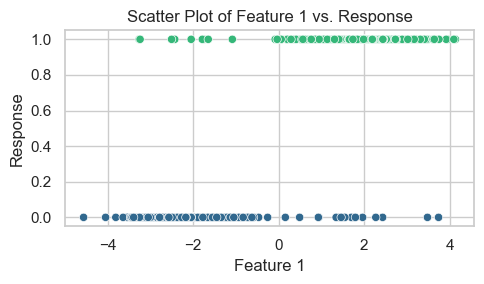

In [6]:
# Parameters
n_samples = 1000
n_features = 1
n_informative =1
n_redundant = 0
random_state = 42

#Noisy Nature of the data.
flip_y = 0.05

#train_test_split
n_train = 700
n_test = 300

# Generate data
X, y = generate_logistic_regression_data(n_samples, n_features,n_informative,n_redundant,flip_y,random_state)
X_train = X[0:(n_train),:]
y_train = y[0:(n_train)]
X_test = X[(n_train):(n_train+n_test),:]
y_test = y[(n_train):(n_train+n_test)]

# Plotting
sns.set(style="whitegrid")
# Adjust the figure size and subplots layout based on the number of features
fig, axes = plt.subplots(n_features, 1, figsize=(5, n_features * 3), squeeze=False)
axes = axes.flatten()  # This ensures that axes is always a 1D array, even for n_features = 1

for i in range(n_features):
    sns.scatterplot(ax=axes[i], x=X[:, i], y=y, hue=y, palette="viridis", legend=False)
    axes[i].set_ylabel('Response')
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_title(f'Scatter Plot of Feature {i+1} vs. Response')

plt.tight_layout()
plt.show()

#### Logistic Regression and Error Analysis

Epoch [10/200], Loss: 1.1513
Epoch [20/200], Loss: 0.9809
Epoch [30/200], Loss: 0.8418
Epoch [40/200], Loss: 0.7300
Epoch [50/200], Loss: 0.6408
Epoch [60/200], Loss: 0.5697
Epoch [70/200], Loss: 0.5126
Epoch [80/200], Loss: 0.4664
Epoch [90/200], Loss: 0.4286
Epoch [100/200], Loss: 0.3974
Epoch [110/200], Loss: 0.3712
Epoch [120/200], Loss: 0.3491
Epoch [130/200], Loss: 0.3303
Epoch [140/200], Loss: 0.3141
Epoch [150/200], Loss: 0.3000
Epoch [160/200], Loss: 0.2877
Epoch [170/200], Loss: 0.2769
Epoch [180/200], Loss: 0.2673
Epoch [190/200], Loss: 0.2587
Epoch [200/200], Loss: 0.2511


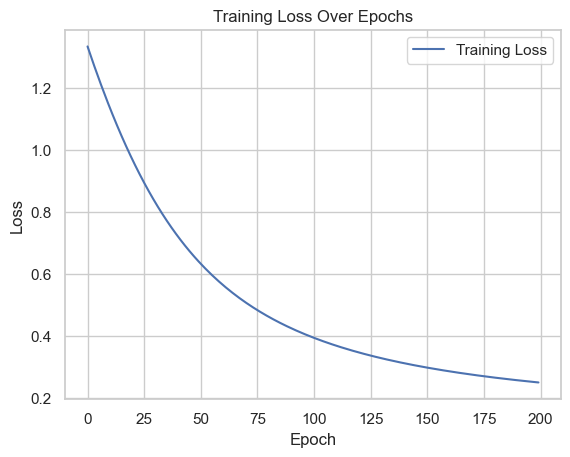

Estimated Model Paramter: [[0.781263]]
Training Accuracy: 97.14%
Testing Accuracy: 97.00%


In [7]:
learning_rate = 0.01
epochs = 200

Regressor,loss = train_logistic_regression(X_train,y_train,epochs,learning_rate)
error_analysis(Regressor,X_train,y_train,X_test,y_test,use_bias = False)

Next, we are looking at the regression cure for this probelm. 

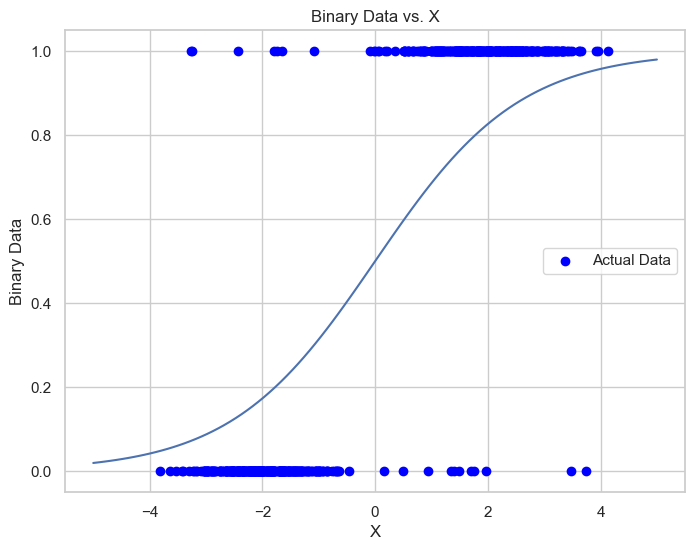

In [19]:
#Regression Curve

B = Regressor.linear.weight.data.numpy()

def sigmoid(x):
    return 1 / (1 + np.exp(-B*x))

#Regression Curve Sigmoid 
x_axis = np.linspace(-5, 5, 100).reshape(100,1)
y_axis = sigmoid(x_axis)



# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Data')
plt.plot(x_axis,y_axis)
plt.xlabel('X')
plt.ylabel('Binary Data')
plt.title('Binary Data vs. X')
plt.legend()
plt.grid(True)
plt.show()

## Experiment 2

Now we are experimenting on the dataset with 10 features. But  now the data is made noisy by increasing the fraction of samples whoes classes are assigned randomly.This done by increasing the variable f_flip. 

1.  n_samples = 1000
2.  n_features = 10
3.  n_informative = 10
4.  n_redundant = 0
5.  flip_y = 0.5

I have set the flip_y value to 0.5 which emphasize that now half of the labels are randomized. 

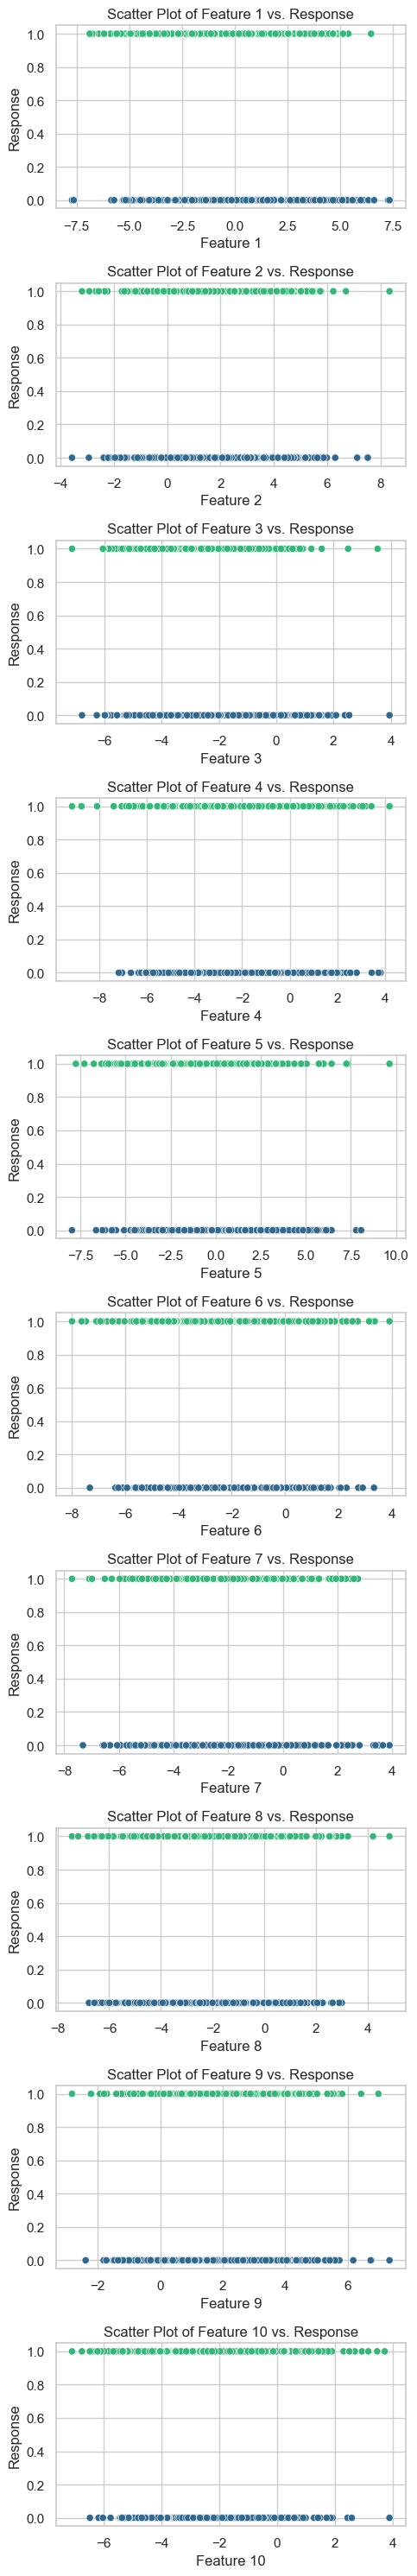

In [43]:
# Parameters
n_samples = 1000
n_features = 10
n_informative =10
n_redundant = 0
random_state = 43

#noisy nature of the data
flip_y = 0.5

#train_test_split
n_train = 700
n_test = 300

# Generate data
X, y = generate_logistic_regression_data(n_samples, n_features,n_informative,n_redundant,flip_y,random_state)
X_train = X[0:(n_train),:]
y_train = y[0:(n_train)]
X_test = X[(n_train):(n_train+n_test),:]
y_test = y[(n_train):(n_train+n_test)]

# Plotting
sns.set(style="whitegrid")
# Adjust the figure size and subplots layout based on the number of features
fig, axes = plt.subplots(n_features, 1, figsize=(5, n_features * 3), squeeze=False)
axes = axes.flatten()  # This ensures that axes is always a 1D array, even for n_features = 1

for i in range(n_features):
    sns.scatterplot(ax=axes[i], x=X[:, i], y=y, hue=y, palette="viridis", legend=False)
    axes[i].set_ylabel('Response')
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_title(f'Scatter Plot of Feature {i+1} vs. Response')

plt.tight_layout()
plt.show()

Epoch [10/200], Loss: 0.9885
Epoch [20/200], Loss: 0.8530
Epoch [30/200], Loss: 0.7668
Epoch [40/200], Loss: 0.7136
Epoch [50/200], Loss: 0.6805
Epoch [60/200], Loss: 0.6594
Epoch [70/200], Loss: 0.6454
Epoch [80/200], Loss: 0.6358
Epoch [90/200], Loss: 0.6288
Epoch [100/200], Loss: 0.6235
Epoch [110/200], Loss: 0.6194
Epoch [120/200], Loss: 0.6161
Epoch [130/200], Loss: 0.6135
Epoch [140/200], Loss: 0.6112
Epoch [150/200], Loss: 0.6093
Epoch [160/200], Loss: 0.6076
Epoch [170/200], Loss: 0.6061
Epoch [180/200], Loss: 0.6048
Epoch [190/200], Loss: 0.6037
Epoch [200/200], Loss: 0.6027


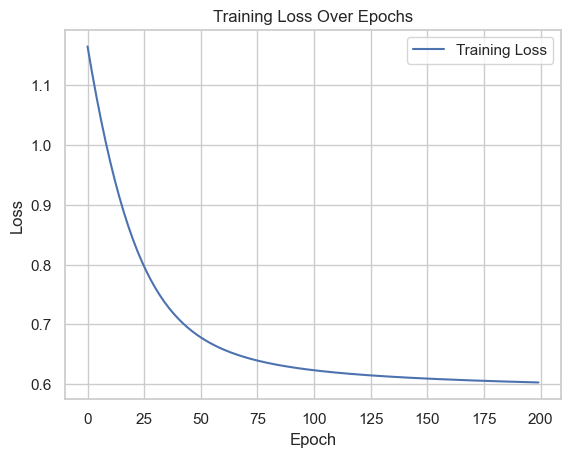

Estimated Model Paramter: [[-0.19879794 -0.00152977  0.07352024 -0.01000535 -0.18747349  0.09014601
  -0.0510232  -0.01763342 -0.01905556 -0.05025163]]
Training Accuracy: 70.86%
Testing Accuracy: 63.67%


In [131]:
learning_rate = 0.01
epochs = 200

Regressor,loss = train_logistic_regression(X_train,y_train,epochs,learning_rate)
error_analysis(Regressor,X_train,y_train,X_test,y_test,use_bias = False)

## Experiment 3

Next I am moving on to a large scale probelms with comparatively large number of data points and features. 

1.  n_samples = 100000
2.  n_features = 1000
3.  n_informative = 750
4.  n_redundant = 250
5.  flip_y = 0.3



In [57]:
# Parameters
n_samples = 100000
n_features = 1000
n_informative = 750
n_redundant = 250
random_state = 43

#noisy nature of the data
flip_y = 0.3

#train_test_split
n_train = 90000
n_test = 10000

# Generate data
X, y = generate_logistic_regression_data(n_samples, n_features,n_informative,n_redundant,flip_y,random_state)
X_train = X[0:(n_train),:]
y_train = y[0:(n_train)]
X_test = X[(n_train):(n_train+n_test),:]
y_test = y[(n_train):(n_train+n_test)]



Epoch [10/200], Loss: 29.1007
Epoch [20/200], Loss: 26.2041
Epoch [30/200], Loss: 23.8765
Epoch [40/200], Loss: 22.0046
Epoch [50/200], Loss: 20.4698
Epoch [60/200], Loss: 19.3123
Epoch [70/200], Loss: 18.4065
Epoch [80/200], Loss: 17.6332
Epoch [90/200], Loss: 16.9768
Epoch [100/200], Loss: 16.4442
Epoch [110/200], Loss: 16.0111
Epoch [120/200], Loss: 15.6160
Epoch [130/200], Loss: 15.2620
Epoch [140/200], Loss: 14.9781
Epoch [150/200], Loss: 14.6705
Epoch [160/200], Loss: 14.3834
Epoch [170/200], Loss: 14.1306
Epoch [180/200], Loss: 13.8874
Epoch [190/200], Loss: 13.6929
Epoch [200/200], Loss: 13.4764


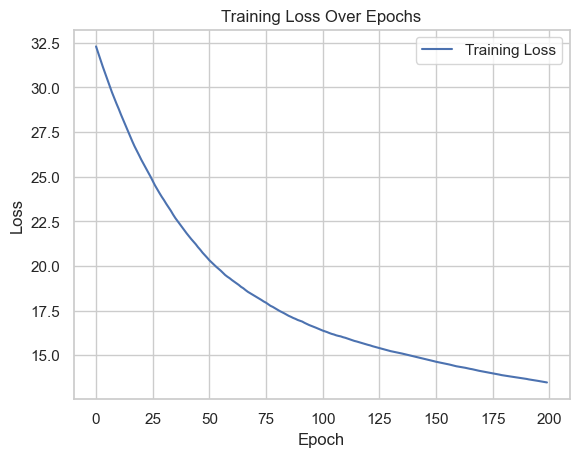

Estimated Model Paramter: [[ 1.83400605e-02 -2.62476932e-02  1.41148074e-02  7.45601626e-03
  -3.41582159e-03 -4.38287342e-03 -4.04108129e-03  2.33959202e-02
   1.78371149e-03  1.63127072e-02  2.86651105e-02  1.00080213e-02
  -6.02359232e-03  2.43195705e-03 -1.51909096e-02  3.00762290e-03
   2.76460610e-02  1.15548680e-02  1.83137283e-02 -7.87922461e-03
   1.21275652e-02 -8.71976186e-03  2.42152996e-03 -2.78647412e-02
  -2.22528111e-02 -1.18443519e-02  2.23924033e-02 -2.76450831e-02
  -6.61508366e-03 -1.86000038e-02 -1.67551711e-02  2.29600333e-02
   2.56969668e-02  2.08767839e-02  1.80767365e-02 -2.63832305e-02
  -6.75820652e-03  1.80306248e-02 -2.95253396e-02 -1.44502139e-02
   1.87652595e-02 -2.57989555e-03 -2.86102910e-02 -1.53948516e-02
   1.70816425e-02 -2.15041842e-02  1.66253913e-02 -2.85641048e-02
  -1.16853975e-02  1.36475300e-03 -2.66904607e-02 -2.63124760e-02
   6.25702040e-03  1.25847459e-02  2.93171238e-02 -5.64590469e-03
  -1.23103335e-02 -1.02380756e-02 -1.47150215e-02 

In [59]:
learning_rate = 0.0001
epochs = 200

Regressor,loss = train_logistic_regression(X_train,y_train,epochs,learning_rate)
error_analysis(Regressor,X_train,y_train,X_test,y_test,use_bias = False)